Hello Everyone,

This is one of my first ever kernels on this website. My aim is to be able to generate a world map where all world football matches have been played.

Moreover, I will generate a few additional features for anyone to use to explore further.

I am using two additional datasets from Kaggle, to borrow the longitude and latitude coordinates of various cities where these matches have been played.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

results = pd.read_csv('../input/international-football-results-from-1872-to-2017/results.csv')
results.head(10)

,date,home_team,away_team,home_ft,away_ft,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland


I have extracted the day, month, year values from the date as it is more usefull. Additionally, I have added a new column to check who won each game and in case there was a draw.

Although I will not be using these new features in this notebook, anyone is welcome to borrow the code to use for further analysis.

In [2]:
results['year'] = pd.to_numeric([date.split('-')[0] for date in results['date']])
results['month'] = pd.to_numeric([date.split('-')[1] for date in results['date']])
results['day'] = pd.to_numeric([date.split('-')[2] for date in results['date']])

def find_winners(df):
    winners = []
    for i, row in df.iterrows():
        if row['home_ft'] > row['away_ft']:
            winners.append(row['home_team'])
        elif row['home_ft'] < row['away_ft']:
            winners.append(row['away_team'])
        else:
            winners.append('Draw')
    return winners
results['winner'] = find_winners(results)
results.head()

,date,home_team,away_team,home_ft,away_ft,tournament,city,country,year,month,day,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,1873,3,8,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Scotland


I noticed that the mention for matches played at a neutral venue was missing from the dataset. I have added the neutral venue matches indicator as a new column.

In [3]:
neutral = []
for index, row in results.iterrows():
    neutral.append((row['country'] not in  row['home_team']) and (row['home_team'] != 'USA'))
    
results['neutral'] = neutral
results['neutral'] = results['neutral'].astype(int)

results.head()

,date,home_team,away_team,home_ft,away_ft,tournament,city,country,year,month,day,winner,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,1873,3,8,England,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Scotland,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Scotland,0


I have borrowed data from the World Cities dataset to finc latitude and longitude values.

In [4]:
cities = pd.read_csv('../input/world-cities-database/worldcitiespop.csv', encoding='latin-1', dtype={
    'Country': str,
    'City': str,
    'AccentCity': str,
    'Region': str
})
cities = cities.dropna()
cities = cities[['Country', 'AccentCity', 'Latitude', 'Longitude']]
cities.head()

,Country,AccentCity,Latitude,Longitude
6,ad,Andorra la Vella,42.500000,1.516667
20,ad,Canillo,42.566667,1.600000
32,ad,Encamp,42.533333,1.583333
49,ad,La Massana,42.550000,1.516667
53,ad,Les Escaldes,42.500000,1.533333


In [5]:
countries = pd.read_csv('../input/world-countries-and-continents-details/countries and continents.csv')
countries = countries.rename(columns = {'official_name_en': 'Name', 'ISO3166-1-Alpha-2': 'Code'})
countries = countries[['Name', 'Code']]
countries['Code'] = countries['Code'].str.lower()

In [6]:
coords = results[['city', 'country']]
df = coords.merge(cities, how='inner', left_on='city', right_on='AccentCity')
new_df = df.merge(countries, how='left', left_on='Country', right_on='Code')
city_coords = new_df[['city', 'Latitude', 'Longitude']]
city_coords = city_coords.drop_duplicates('city')
city_coords = city_coords.rename(columns={'Latitude':'latitude', 'Longitude': 'longitude'})

Finally, I have merged the geographical coordinates data to the original dataset and is available in the combined dataframe named 'new_results'.

In [7]:
new_results = results.merge(city_coords, how='left', on='city')
new_results.head()

,date,home_team,away_team,home_ft,away_ft,tournament,city,country,year,month,day,winner,neutral,latitude,longitude
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw,0,55.833333,-4.25
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,1873,3,8,England,0,42.983333,-81.25
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Scotland,0,55.833333,-4.25
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw,0,42.983333,-81.25
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Scotland,0,55.833333,-4.25


A World Map to see where football has been played most:

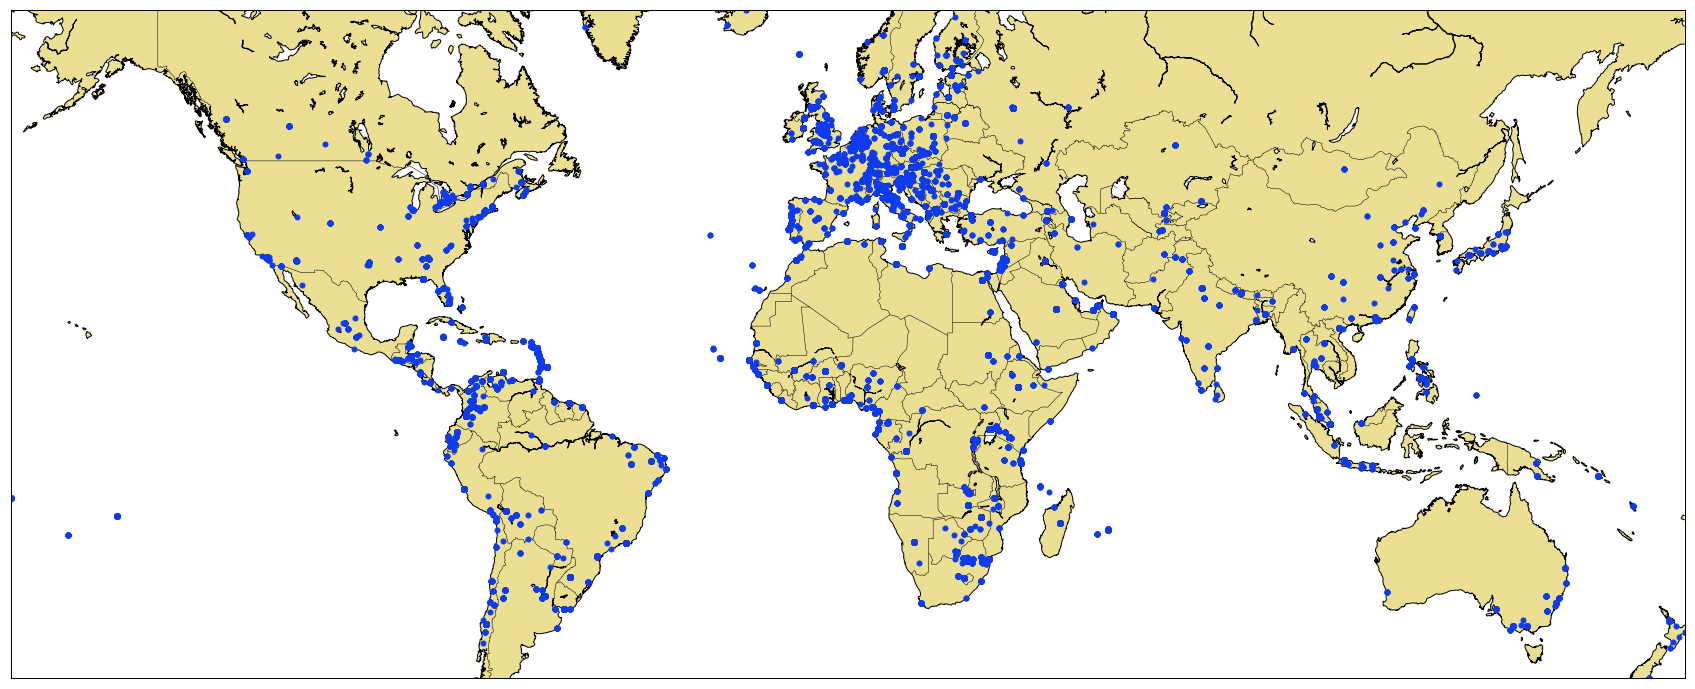

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

lat_min = min(new_results['latitude'])
lat_max = max(new_results['latitude'])
lon_min = min(new_results['longitude'])
lon_max = max(new_results['longitude'])

m = Basemap(
    projection='merc', 
    llcrnrlat=lat_min, 
    urcrnrlat=lat_max, 
    llcrnrlon=lon_min, 
    urcrnrlon=lon_max,
    resolution='l'
)


longitudes = new_results['longitude'].tolist()
latitudes = new_results['latitude'].tolist()
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(1,1,1)
ax = m.drawcountries()
ax = m.drawcoastlines()
ax = m.fillcontinents(color='#eadf93')
ax = m.drawmapboundary()
ax = m.scatter(longitudes, latitudes, s=25, zorder=2, latlon=True, color='#0e3bef')

I have tailored the map a little to check where FIFA World Cup matches have been played over the world:

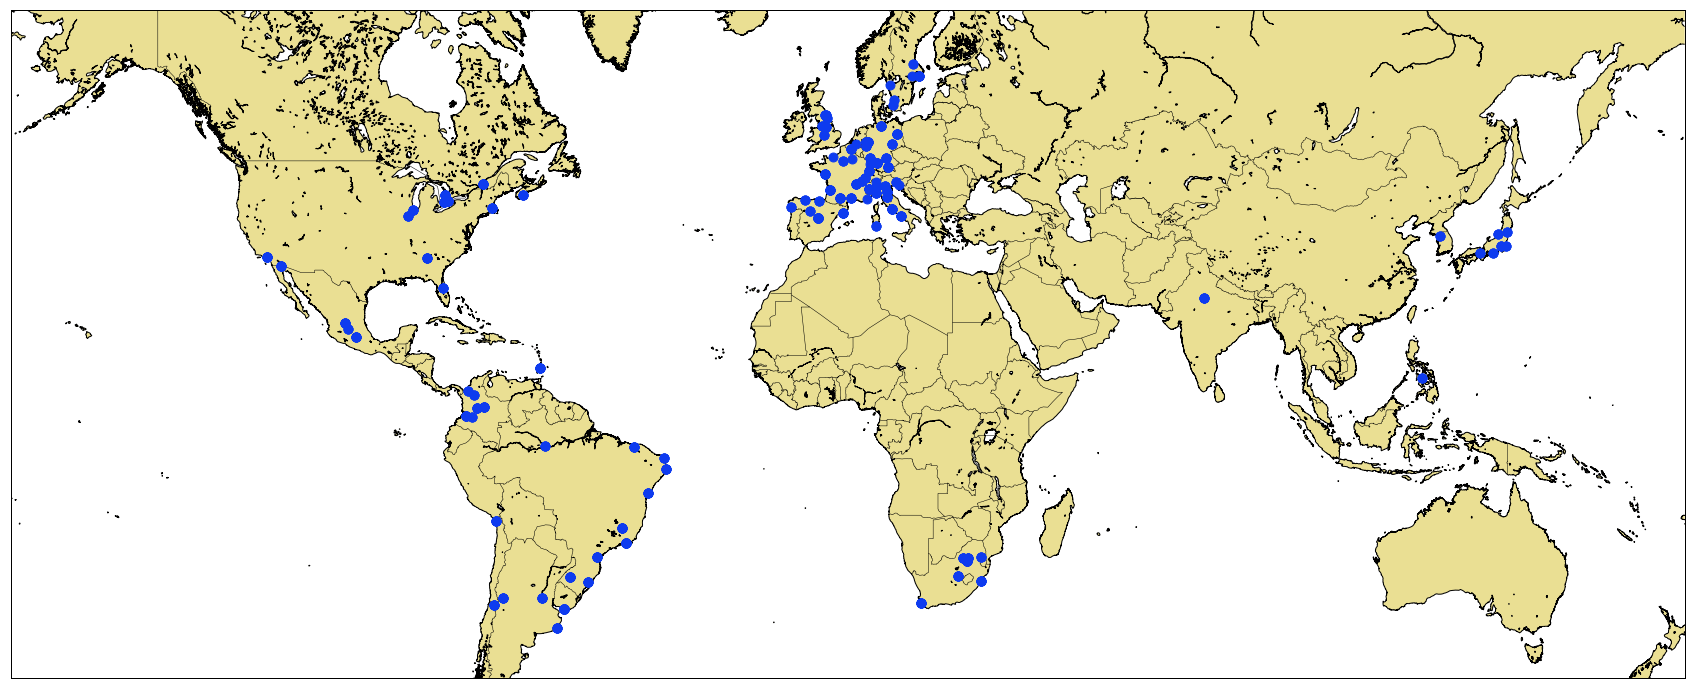

In [9]:
world_cup = new_results[new_results['tournament']=='FIFA World Cup']

m = Basemap(
    projection='merc', 
    llcrnrlat=lat_min, 
    urcrnrlat=lat_max, 
    llcrnrlon=lon_min, 
    urcrnrlon=lon_max,
    resolution='i'
)


longitudes = world_cup['longitude'].tolist()
latitudes = world_cup['latitude'].tolist()
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(1,1,1)
ax = m.drawcountries()
ax = m.drawcoastlines()
ax = m.fillcontinents(color='#eadf93')
ax = m.drawmapboundary()
ax = m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, color='#0e3bef')

Regards,
Maaz Imran